In [73]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions


In [71]:
# importing image
filename = 'images/sun_on_scene2.jpeg'


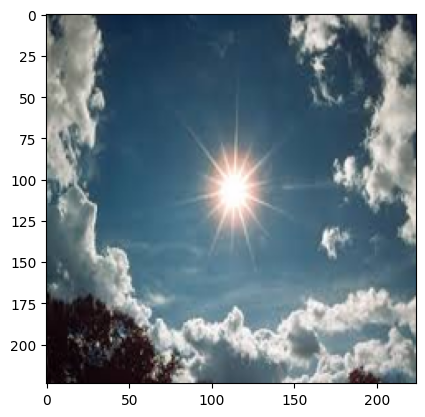

In [72]:
# Load the input image using PIL
img = Image.open(filename)

# Resize the image to the target size (224x224)
resized_img = img.resize((224, 224))
plt.imshow(resized_img)


In [75]:
#initializing the model to predict the image details using predefined models.
model = tf.keras.applications.mobilenet_v2.MobileNetV2()
resizedimg = image.img_to_array(resized_img)
finalimg = np.expand_dims(resizedimg,axis=0)
finalimg = tf.keras.applications.mobilenet_v2.preprocess_input(finalimg)
finalimg.shape
predictions = model.predict(finalimg)


1/1 [==============================] - 2s 2s/step


In [76]:
# To predict and decode the image details
results = imagenet_utils.decode_predictions(predictions)
print(results)

35363/35363 [==============================] - 0s 1us/step
[[('n09472597', 'volcano', 0.8030706), ('n09193705', 'alp', 0.043862976), ('n09288635', 'geyser', 0.023434436), ('n09468604', 'valley', 0.006883827), ('n03888257', 'parachute', 0.0042855185)]]


In [81]:
# Initializing the MobileNetV2 model to predict image details
model = MobileNetV2(weights='imagenet')


In [82]:
# Convert the resized image to a NumPy array and preprocess it for the model
resized_img_array = image.img_to_array(resized_img)
resized_img_array = np.expand_dims(resized_img_array, axis=0)
preprocessed_img = preprocess_input(resized_img_array)


In [83]:
# Predict the image
predictions = model.predict(preprocessed_img)


1/1 [==============================] - 1s 561ms/step


In [84]:
# Decode the predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]


1: volcano (0.80)
2: alp (0.04)
3: geyser (0.02)
4: valley (0.01)
5: parachute (0.00)


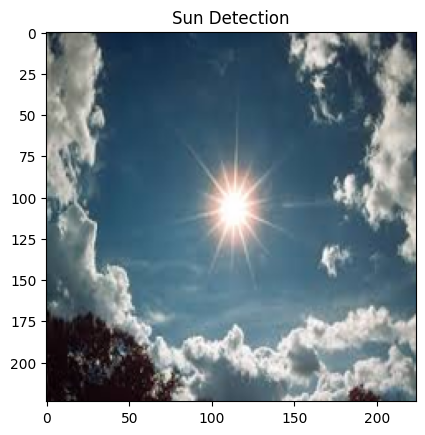

In [86]:
# Display the results
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Display the original image
plt.figure()
plt.imshow(resized_img)
plt.title('Sun Detection')
plt.show()